In [1]:
%load_ext autoreload
%autoreload 2
import terra
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

In [2]:
from domino.evaluate.analyze import compute_sdm_metrics
from domino.evaluate.evaluate import evaluate_sdms

evaluate_df: pd.DataFrame = evaluate_sdms.out(2439)
compute_sdm_metrics(evaluate_df)

task: compute_sdm_metrics, run_id=2782


100%|██████████| 5/5 [00:48<00:00,  9.79s/it]


In [4]:
df = compute_sdm_metrics.out(2782).load()
df

,run_id,corr,target,correlate,sdm_class
0,2445,0.1,Lung_Lesion_uzeros,gender_male,<class 'domino.sdm.pca.KernelPCASDM'>
1,2469,0.1,Lung_Lesion_uzeros,gender_male,<class 'domino.sdm.george.GeorgeSDM'>
2,2441,0.1,Lung_Lesion_uzeros,gender_male,<class 'domino.sdm.pca.PCASDM'>
3,2443,0.0,Lung_Lesion_uzeros,gender_male,<class 'domino.sdm.pca.KernelPCASDM'>
4,2455,0.0,Lung_Lesion_uzeros,gender_male,<class 'domino.sdm.george.GeorgeSDM'>
...,...,...,...,...,...
1540,2752,0.7,Support_Devices_uzeros,young,<class 'domino.sdm.george.GeorgeSDM'>
1541,2736,0.7,Support_Devices_uzeros,young,<class 'domino.sdm.pca.PCASDM'>
1542,2734,0.8,Support_Devices_uzeros,young,<class 'domino.sdm.pca.KernelPCASDM'>
1543,2751,0.8,Support_Devices_uzeros,young,<class 'domino.sdm.george.GeorgeSDM'>


In [10]:
df = pd.DataFrame(
    {
        "x": [0, 1] * 10,
        "y": np.zeros
    }
)
df.apply(lambda x: 1 if x["x"] % 2 == 0 else None)

In [50]:
for idx in range(dp["slices"].shape[-1]):
    dp[f"slice_{idx}"] = dp["slices"].data[:, idx]

[2021-07-16 17:51:56,224][WARNING][matplotlib.legend:1225] :: No handles with labels found to put in legend.


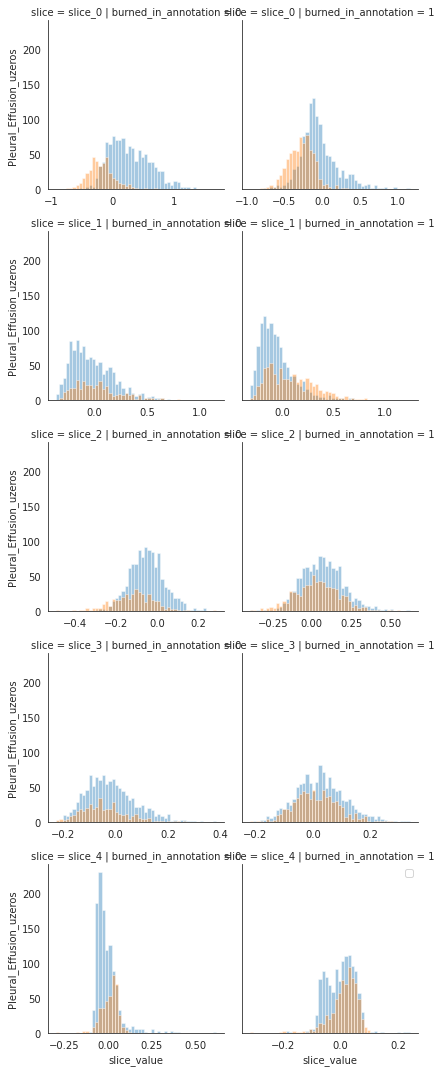

In [59]:
sns.set_style("white")
plot_df = dp.to_pandas()
plot_df = plot_df.melt(
    value_vars=[f"slice_{idx}" for idx in range(5)],
    id_vars=[target, correlate],
    var_name="slice",
    value_name="slice_value"
)

def multihist(x, hue, n_bins=50, color=None, **kws):
    bins = np.linspace(x.min(), x.max(), n_bins)
    for _, x_i in x.groupby(hue):
        plt.hist(x_i, bins, **kws)

col, hue = correlate, target
#col, hue = target, correlate

g = sns.FacetGrid(data=plot_df, row="slice", col=col, sharex=False)
g.map(multihist, "slice_value", hue, alpha=0.4)
plt.legend()

In [62]:
import pingouin as pg
run_id = 2664
inp = terra.inp(run_id)
target, correlate = inp["target"], inp["correlate"]
dp = terra.out(run_id, load=True)
for idx in range(dp["slices"].shape[-1]):
    dp[f"slice_{idx}"] = dp["slices"].data[:, idx]

df = dp.to_pandas()
#pg.partial_corr(data=df, x=correlate, y="slice_0", covar=[target])
pg.corr(x=df[correlate], y=df["slice_0"])

,n,r,CI95%,p-val,BF10,power
pearson,3403,-0.412171,"[-0.44, -0.38]",1.035501e-139,5.709e+135,1.0


In [1]:
from domino.evaluate.analyze import compute_sdm_metrics
from domino.evaluate.evaluate import evaluate_sdms

evaluate_df: pd.DataFrame = evaluate_sdms.out(2439)
compute_sdm_metrics(evaluate_df)

NameError: name 'pd' is not defined

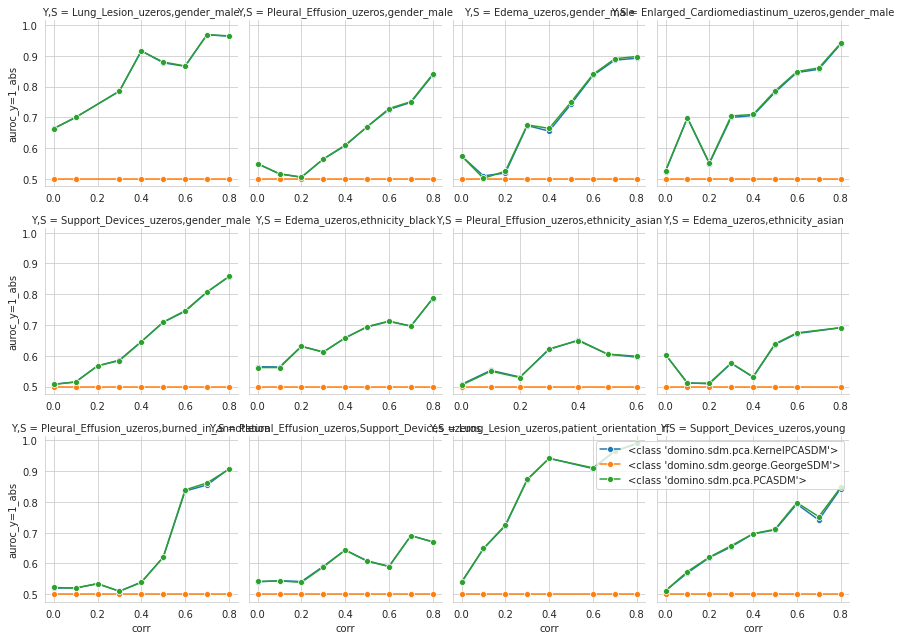

In [102]:

import seaborn as sns
metrics_df["Y,S"] = metrics_df.target + "," + metrics_df.correlate
metrics_df["partial_corr_s_abs"] = np.abs(metrics_df["partial_corr_s"])
metrics_df["auroc_abs"] = np.maximum(metrics_df["auroc"], 1 - metrics_df["auroc"])
metrics_df["auroc_y=0_abs"] = np.maximum(metrics_df["auroc_y=0"], 1 - metrics_df["auroc_y=0"])
metrics_df["auroc_y=1_abs"] = np.maximum(metrics_df["auroc_y=1"], 1 - metrics_df["auroc_y=1"])

g = sns.FacetGrid(metrics_df, col="Y,S",  col_wrap=4, hue="sdm_class", sharex=False)
plot = g.map(sns.lineplot, "corr", "auroc_y=1_abs", marker="o")
#plot.savefig("test.png")
sns.set_style("whitegrid")
sns.despine()
plt.legend()